In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GC_Functions
import importlib
from scipy.integrate import odeint

plt.style.use("ggplot")
plt.rcParams['figure.dpi']= 300

$$
\text{Our dynamical variables are }(\theta, P\psi, \zeta, \rho_{||}) \text {, and they are governed through Hamilton's
equations:}\\~\\
\dot \theta = \dfrac{1}{q}\rho_{||}B^2 + \dfrac{1}{\sqrt{2\psi}}(\mu + \rho_{||}^2B) \\~\\
\dot P_\theta = -\dfrac{1}{q}(\mu + \rho_{||}^2B)\sqrt{2\psi}\sin(\theta) \\~\\
\dot \zeta = \rho_{||}B^2 \\~\\
\dot \rho_{||} = -\dfrac{1}{q}(\mu + \rho_{||}^2B)\sqrt{2\psi}\sin(\theta) \\~\\

\text{where: } \quad B = 1 - \sqrt{2\psi}\cos(\theta), \qquad q=1

$$
\text{Convertion to Canonical coordinates  } \theta, P_\theta, \zeta, P_\zeta:\\
\theta = \theta \quad,\quad P_\theta = \psi  \quad,\quad 
\zeta = \zeta \quad,\quad P_\zeta = \rho_{||} - \psi_p
$$

In [2]:
# Parameters
mu = 10**(-3) # Magnetic moment
g  = 1 # Poloidal current

# Initial Conditions
theta0 = 0
psip0 = .075
z0 = 0
Pz0 = -0.1
rho0 = Pz0 + psip0

# Time span
tspan = np.linspace(0, 1000, 10000)

params  = {"mu" : mu, "g" : g}
init    = np.array([theta0, psip0, z0, Pz0, rho0])
GC_Functions.get_params(params, init)

In [3]:
importlib.reload(GC_Functions)

# Motion
sol = GC_Functions.motion(init, tspan, params)
theta_sol, psi_sol, z_sol, Pz_sol, rho_sol = sol

# Canonical
theta3d, psi3d, z, Pz3d = GC_Functions.canonical(sol)

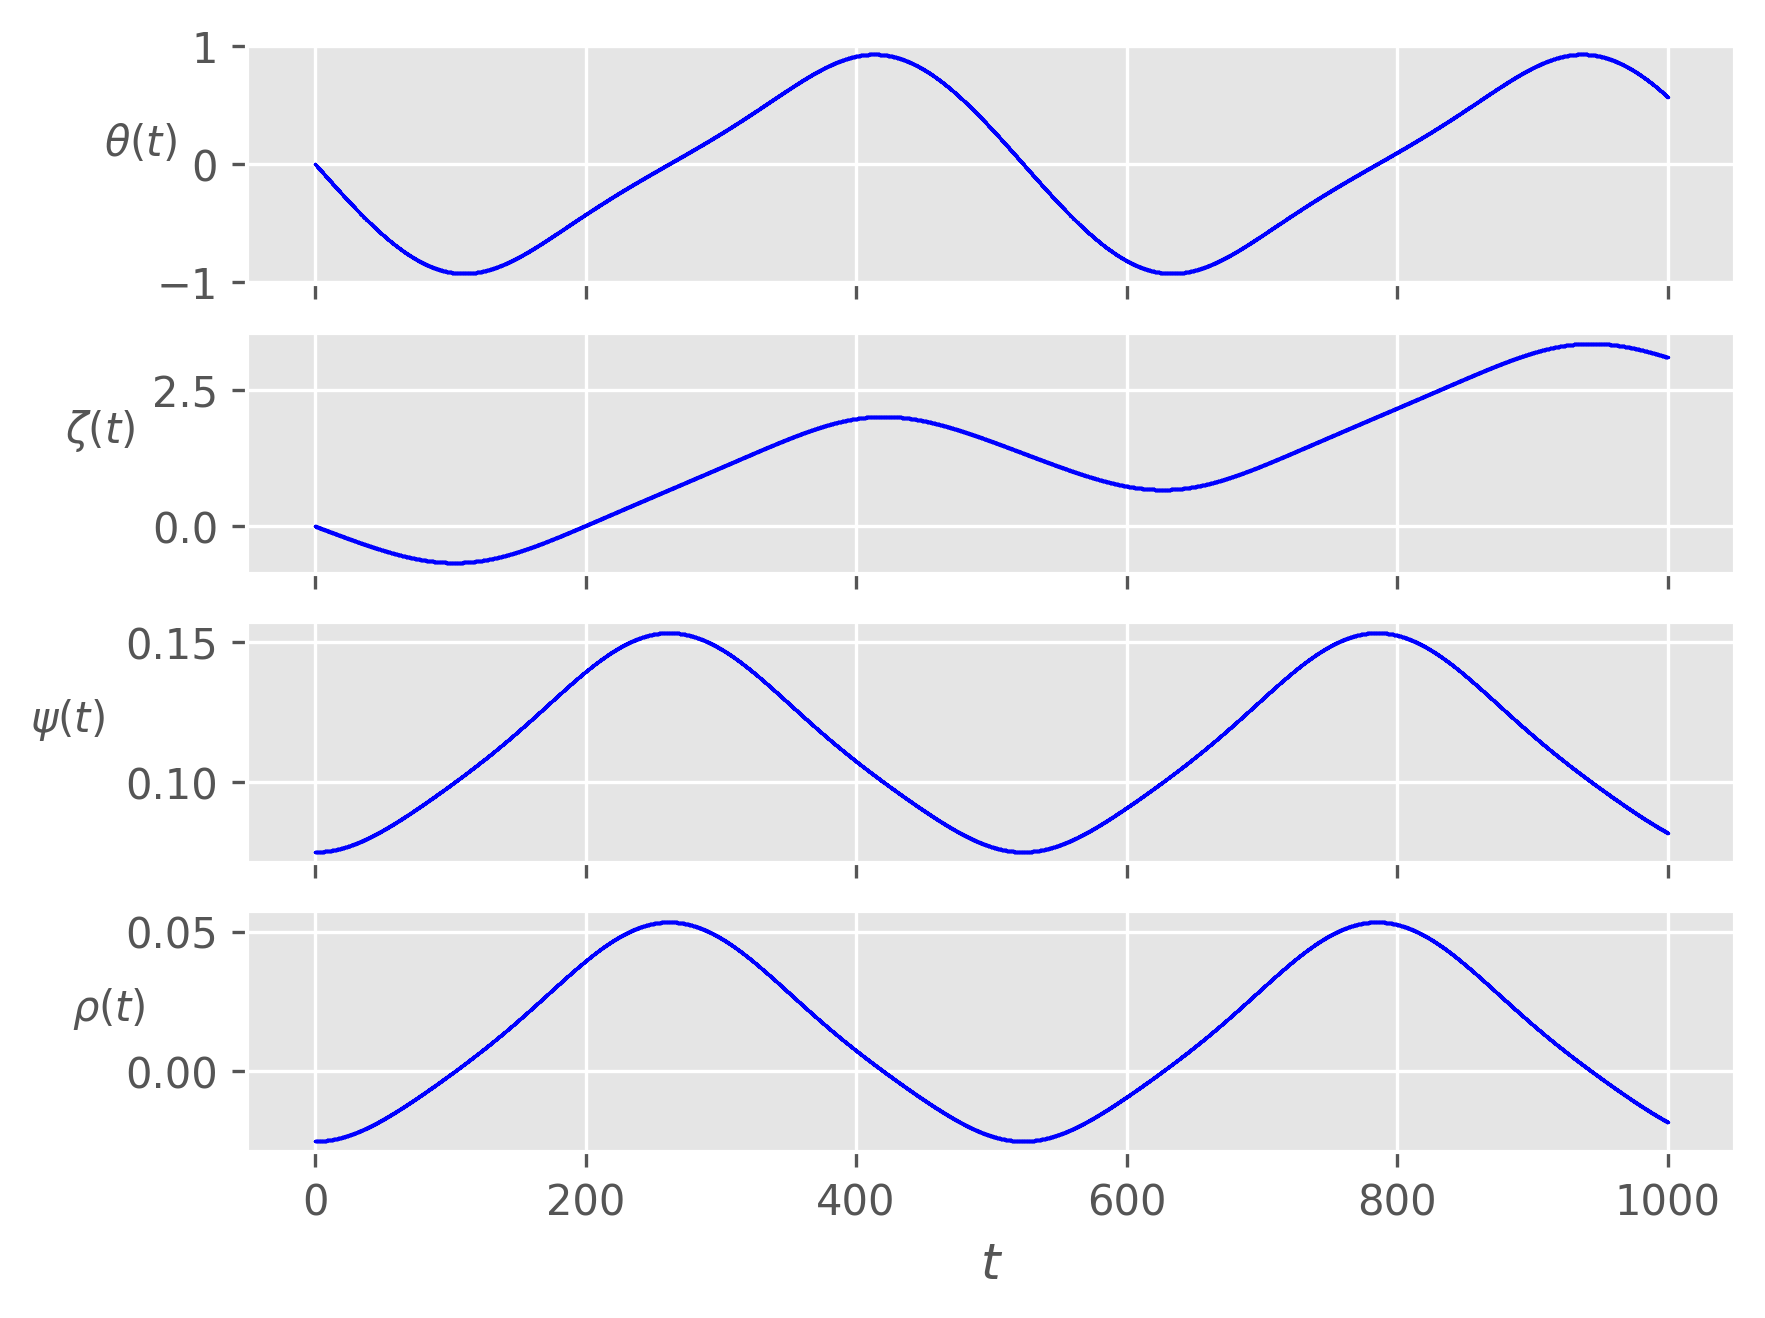

In [4]:
importlib.reload(GC_Functions)
GC_Functions.time_plots(tspan, sol)

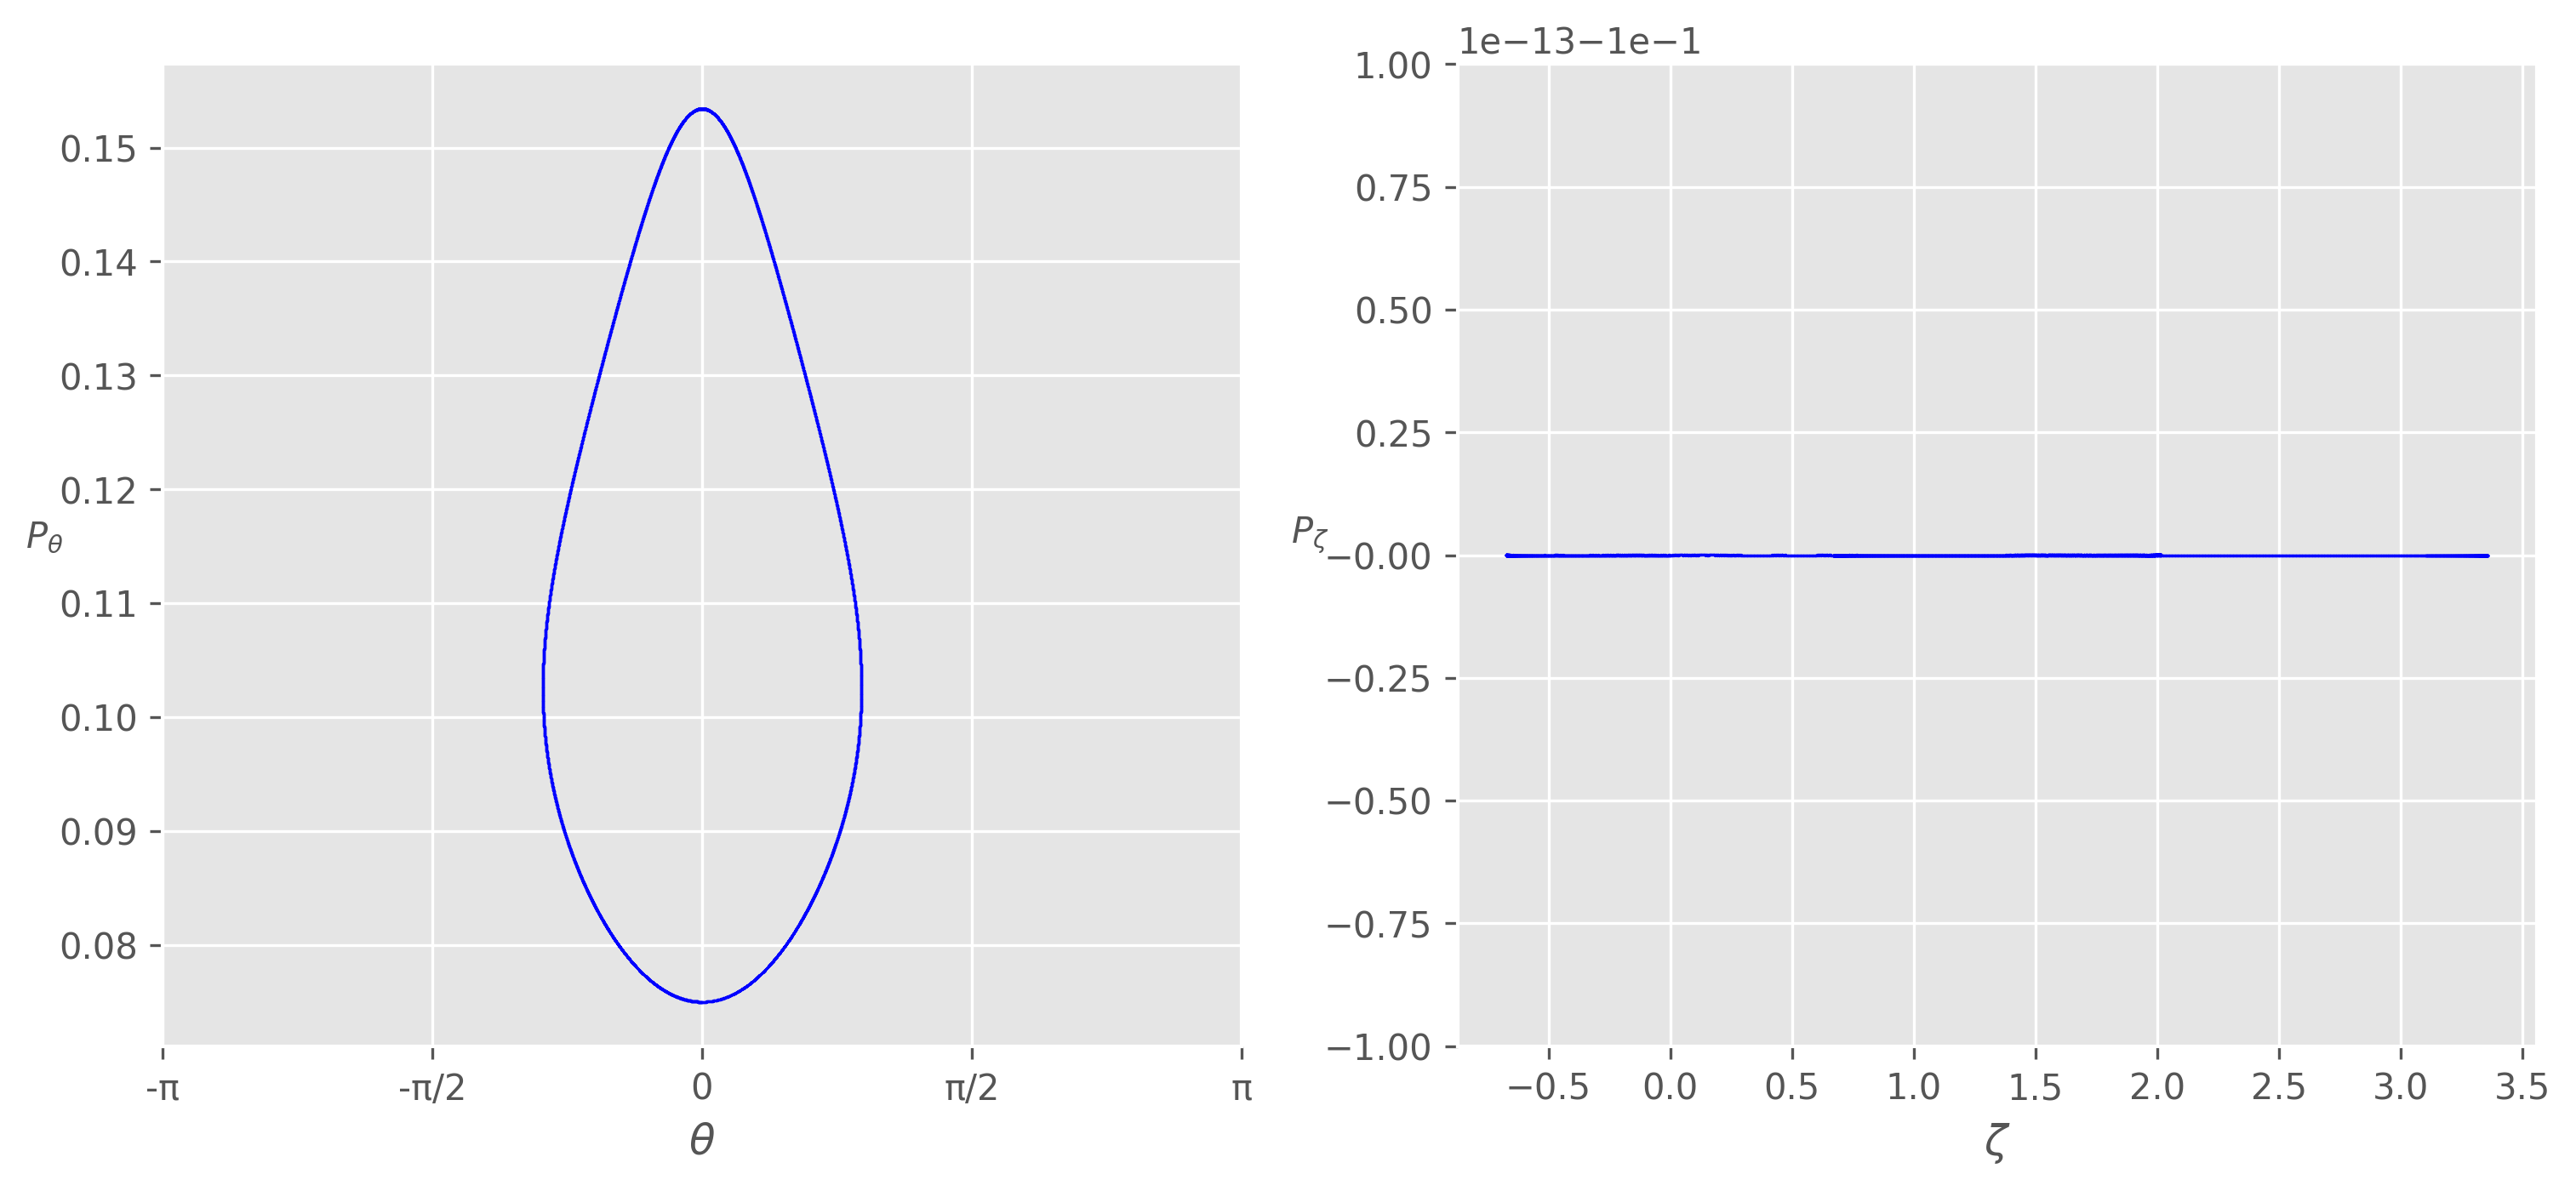

In [5]:
importlib.reload(GC_Functions)
GC_Functions.drift_plot(theta3d, psi3d, z, Pz3d, mod = False)

In [6]:
# importlib.reload(GC_Functions_with_E)

# theta_min, theta_max    = [-np.pi, np.pi]
# psi_min, psi_max        = np.array([0, 0.5])
# Pz_min, Pz_max          = [-1, Pz0]
# limits = theta_min, theta_max, psi_min, psi_max, Pz_min, Pz_max
# GC_Functions_with_E.contour3d(limits)

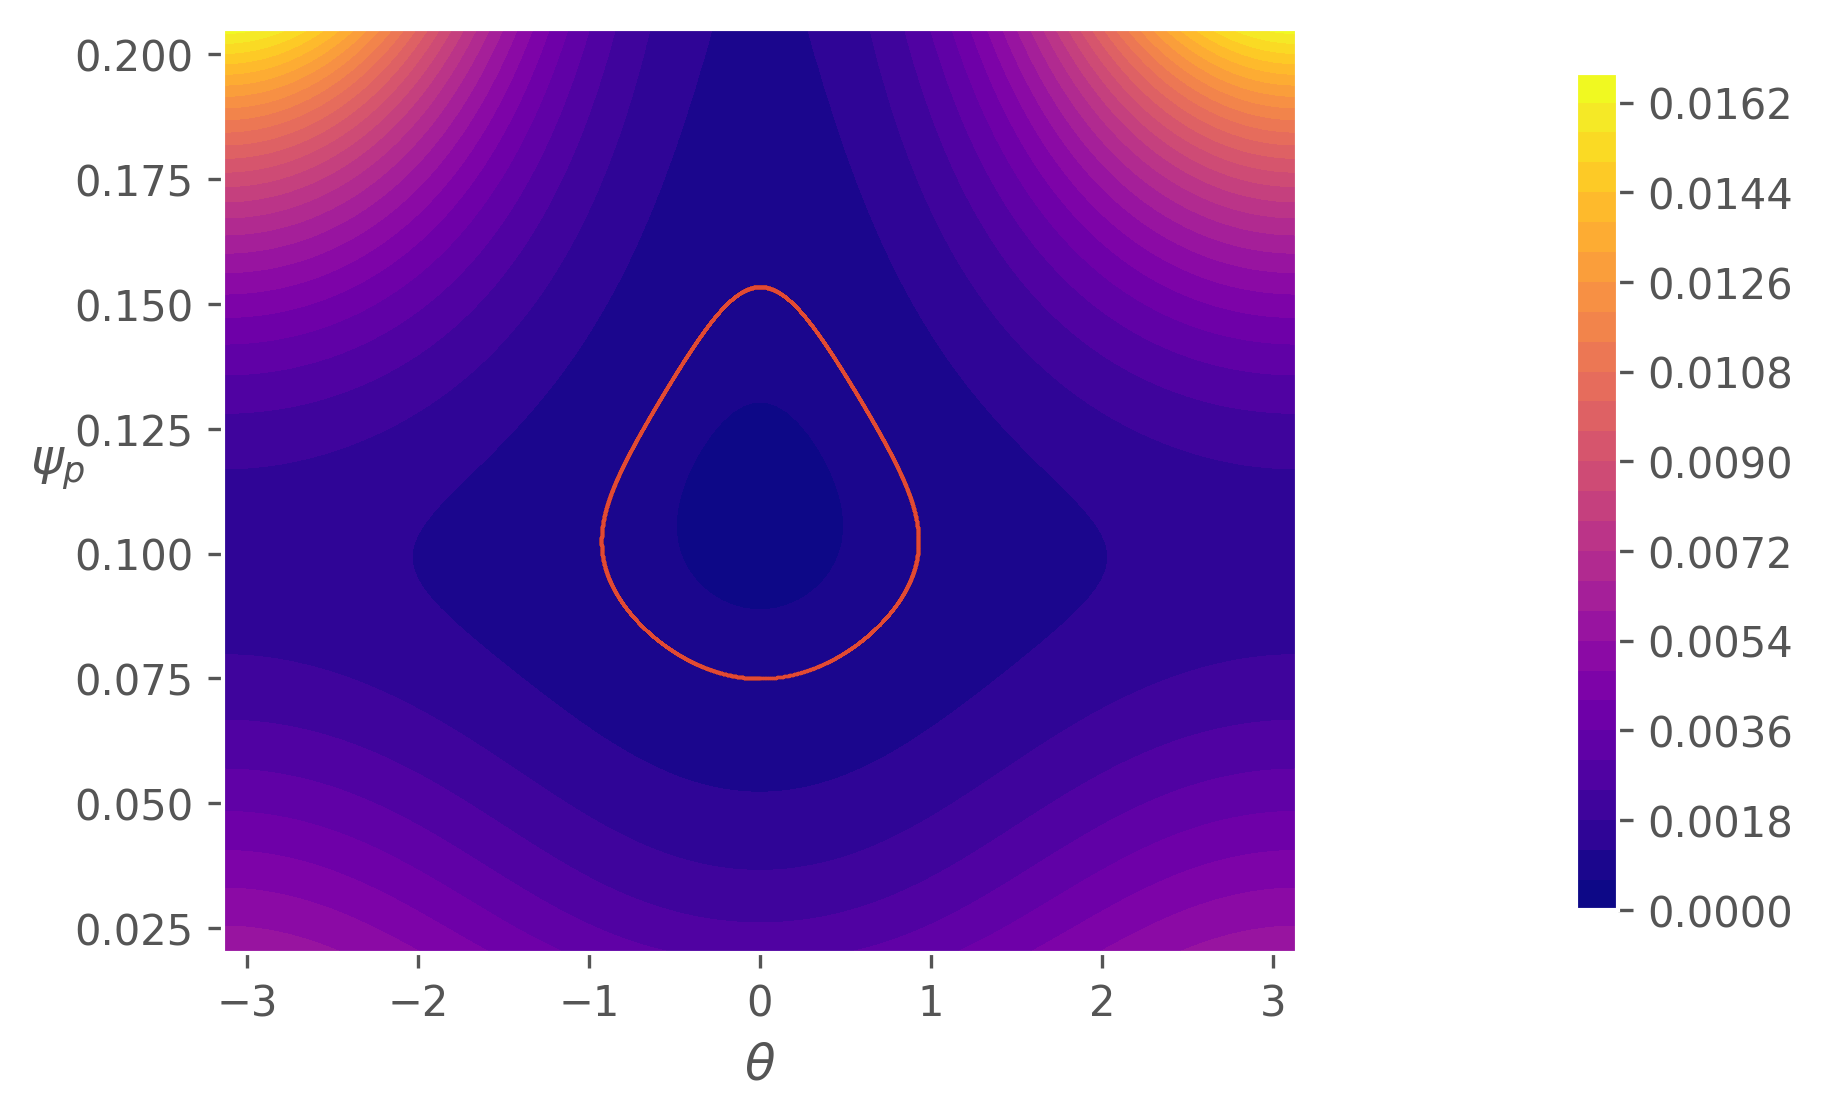

In [7]:
importlib.reload(GC_Functions)

theta_min, theta_max    = [-np.pi, np.pi]#[0, 4*np.pi]
psi_min, psi_max        = np.array([0.02, 0.205])
limits = theta_min, theta_max, psi_min, psi_max, Pz0
GC_Functions.contour(limits)
theta_mod = np.mod(theta3d, 2*np.pi)
plt.scatter(theta3d, psi3d , s = 0.08)

c:\VS Code\Projects\Hamilton\GC - White Plots - Working\GC_Functions.py:35: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(dSdt, y0 = init, t=tspan, tfirst=True)


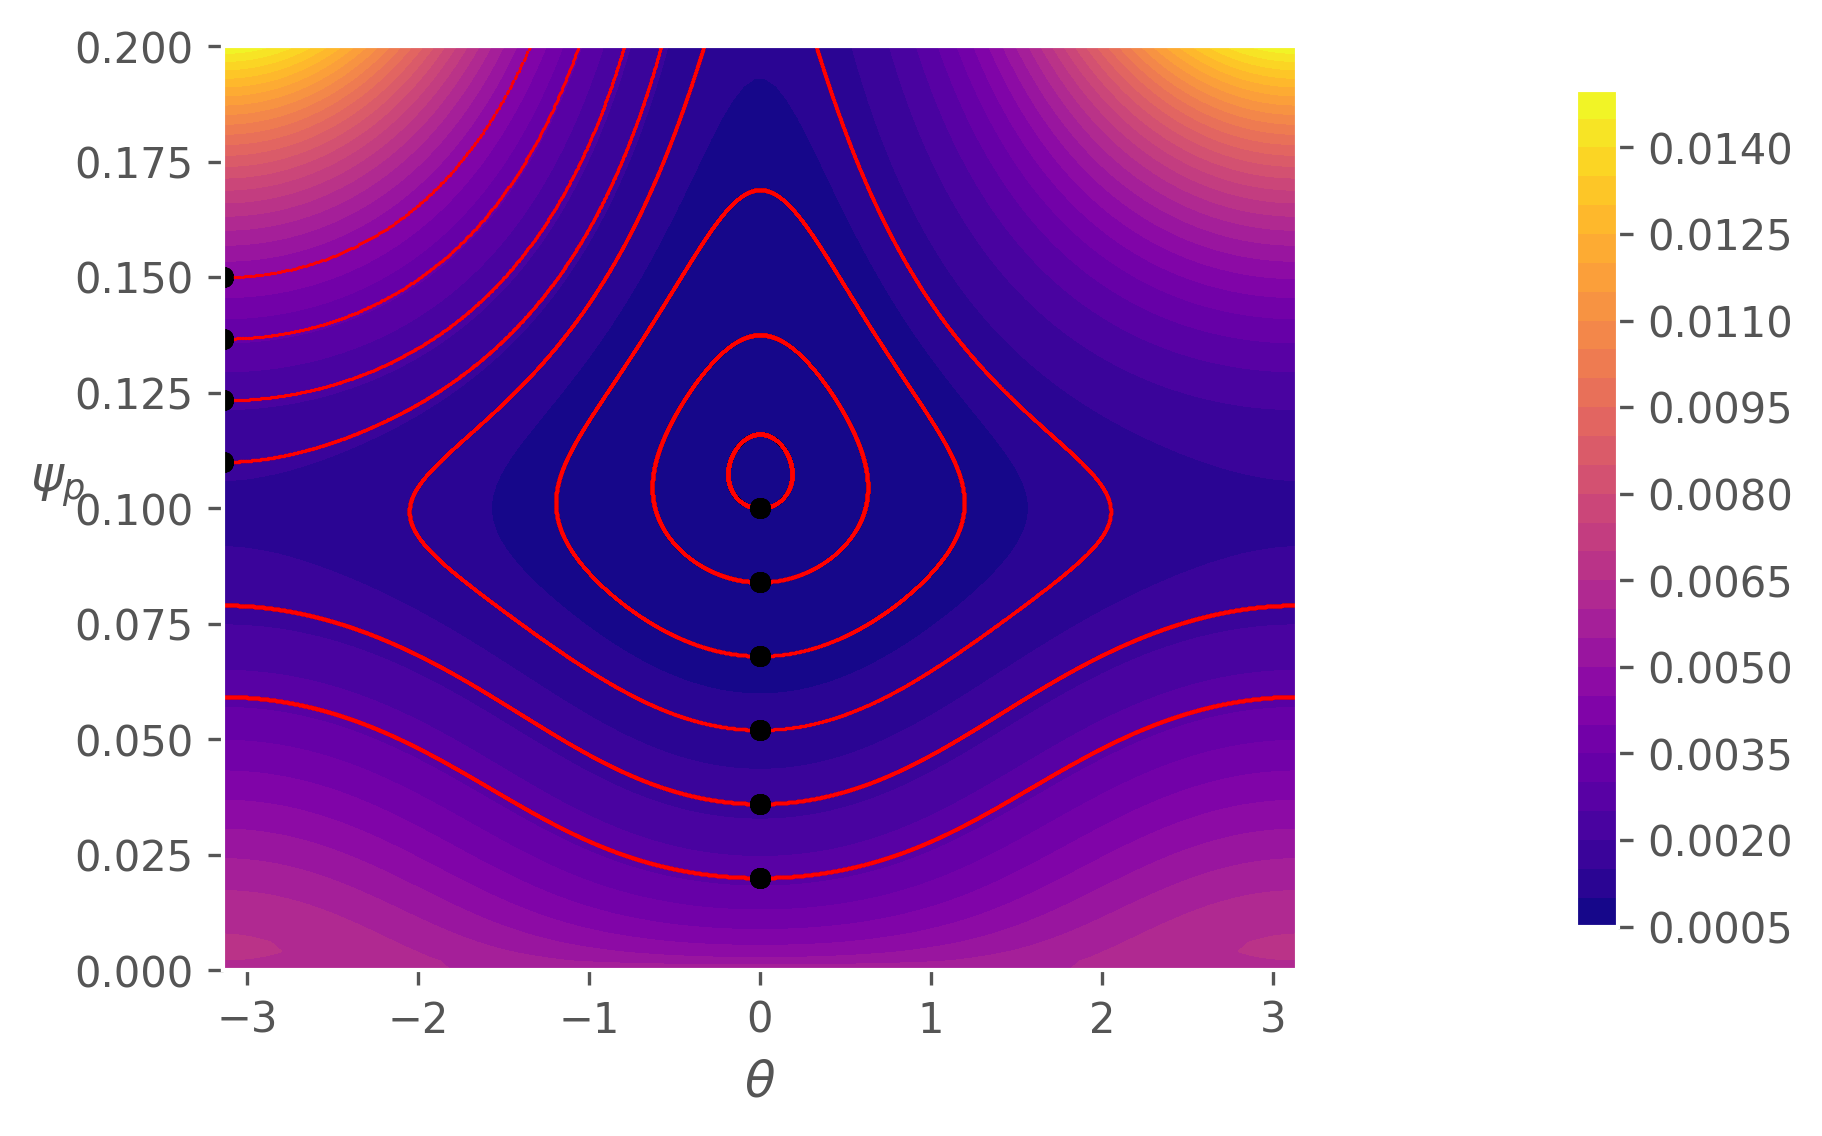

In [8]:
importlib.reload(GC_Functions)

# Initial conditions arrays
psip0s1 = np.linspace(0.02, 0.1, 6)
psip0s2 = np.linspace(0.11, 0.15, 4)

theta0s1 =  0    *np.ones(len(psip0s1))
theta0s2 = -np.pi*np.ones(len(psip0s2))

psip0s  = np.hstack([psip0s1, psip0s2])
theta0s = np.hstack([theta0s1, theta0s2])

# Countour plot
theta_min, theta_max    = [-np.pi, np.pi]#[0, 4*np.pi]
psi_min, psi_max        = np.array([0.0, 0.2])
limits = theta_min, theta_max, psi_min, psi_max, Pz0
GC_Functions.contour(limits)

# Orbits
GC_Functions.orbits_contour(theta0s, psip0s, tspan, init, params)